In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#load data
train_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
print('The shape of training dataset : ', train_df.shape)
print('The shape of testing dataset : ', test_df.shape)

The shape of training dataset :  (60000, 785)
The shape of testing dataset :  (10000, 785)


In [18]:
#converting the pixel values into array format
train = np.array(train_df, dtype = 'float32')
test = np.array(test_df, dtype = 'float32')

In [21]:
train_X = train[:,1:]
train_Y = train[:,0]
test_X= test[:,1:]
test_Y=test[:,0]

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 784) (60000,)
Testing data shape :  (10000, 784) (10000,)


In [22]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Text(0.5, 1.0, 'Ground Truth : 0.0')

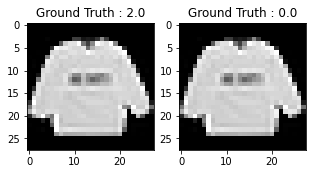

In [26]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0].reshape((28,28)), cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(train_X[0].reshape((28,28)), cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [27]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [28]:
#The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32
#you also have to rescale the pixel values in range 0 - 1 inclusive

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [29]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2.0
After conversion to one-hot: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=21)

In [31]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [32]:
batch_size = 128
epochs = 20
num_classes = 10

In [33]:
#Neural network architecture

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [34]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [36]:
train_model = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 162us/step - loss: 0.6792 - accuracy: 0.7454 - val_loss: 0.3968 - val_accuracy: 0.8561
Epoch 2/20
48000/48000 [==============================] - 3s 64us/step - loss: 0.4165 - accuracy: 0.8472 - val_loss: 0.3278 - val_accuracy: 0.8799
Epoch 3/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.3619 - accuracy: 0.8670 - val_loss: 0.3043 - val_accuracy: 0.8867
Epoch 4/20
48000/48000 [==============================] - 3s 65us/step - loss: 0.3299 - accuracy: 0.8792 - val_loss: 0.2768 - val_accuracy: 0.9004
Epoch 5/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.3089 - accuracy: 0.8857 - val_loss: 0.2658 - val_accuracy: 0.9001
Epoch 6/20
48000/48000 [==============================] - 3s 62us/step - loss: 0.2891 - accuracy: 0.8915 - val_loss: 0.2523 - val_accuracy: 0.9068
Epoch 7/20
48000/48000 [==============================] - 3s 65us/s

In [40]:
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 1s 91us/step


In [41]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2021921631515026
Test accuracy: 0.9235000014305115


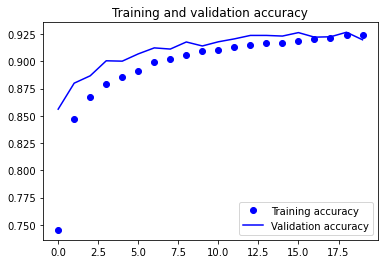

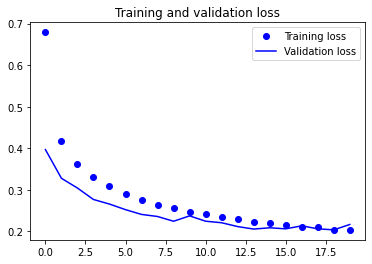

In [44]:
#plotting the accuracy and loss plots between training and validation data for the one last time

accuracy = train_model.history['accuracy']
val_accuracy = train_model.history['val_accuracy']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
predicted_classes = model.predict(test_X)

In [47]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [48]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9192 correct labels


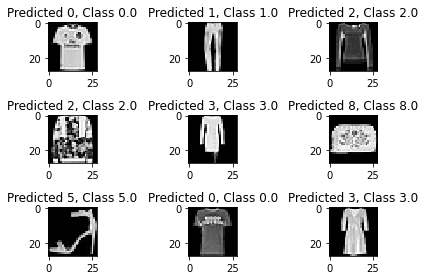

In [50]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 808 incorrect labels


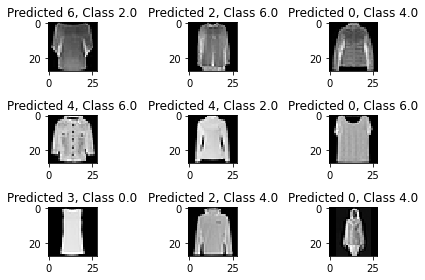

In [51]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [ ]:
#Classification report

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))